<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data preparation" data-toc-modified-id="Data preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Data analysis" data-toc-modified-id="Data analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span></li>

# Recovery of gold from ore

We are going to prepare a prototype of a machine learning model for the "Digit". The company develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold-bearing ore. We will use data with mining and cleaning parameters.

The model will help optimize production to launch an enterprise with profitable characteristics.

This is our work plan:

1. Preparing the data
2. Conducting a research analysis of the data
3. Building and training a model

# Data preparation

Let's start by importing the necessary packages.

In [2]:
import collections
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.dummy import DummyRegressor
import warnings 
warnings.filterwarnings("ignore")

Let's see what's in there with a loop.

In [5]:
data_full = pd.read_csv(r'C:\Users\pinos\Downloads\gold_industry_full(1).csv')
data_train = pd.read_csv(r'C:\Users\pinos\Downloads\gold_industry_train(1).csv')
data_test = pd.read_csv(r'C:\Users\pinos\Downloads\gold_industry_test(1).csv')

In [3]:
for i in data_full, data_train, data_test:
    data_full.info()
    data_full.head()
    data_full.describe()
    data_train.info()
    data_train.head()
    data_test.info()
    data_test.head()
    display(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


Most of the data is float type, minus the date, which is a string. Taking into account the type of data, we can assume that the classification model will not be the most suitable for solving the problem we are facing.

We check if there is any missing data with a loop again.

In [4]:
for i in data_full, data_train, data_test:
    display(data_full.isna().mean())
    display(data_train.isna().mean())
    display(data_test.isna().mean())

date                                          0.000000
final.output.concentrate_ag                   0.000051
final.output.concentrate_pb                   0.000051
final.output.concentrate_sol                  0.010854
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000051
secondary_cleaner.state.floatbank5_b_air      0.000051
secondary_cleaner.state.floatbank5_b_level    0.000051
secondary_cleaner.state.floatbank6_a_air      0.000103
secondary_cleaner.state.floatbank6_a_level    0.000051
Length: 87, dtype: float64

date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

date                                          0.000000
final.output.concentrate_ag                   0.000051
final.output.concentrate_pb                   0.000051
final.output.concentrate_sol                  0.010854
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000051
secondary_cleaner.state.floatbank5_b_air      0.000051
secondary_cleaner.state.floatbank5_b_level    0.000051
secondary_cleaner.state.floatbank6_a_air      0.000103
secondary_cleaner.state.floatbank6_a_level    0.000051
Length: 87, dtype: float64

date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

date                                          0.000000
final.output.concentrate_ag                   0.000051
final.output.concentrate_pb                   0.000051
final.output.concentrate_sol                  0.010854
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000051
secondary_cleaner.state.floatbank5_b_air      0.000051
secondary_cleaner.state.floatbank5_b_level    0.000051
secondary_cleaner.state.floatbank6_a_air      0.000103
secondary_cleaner.state.floatbank6_a_level    0.000051
Length: 87, dtype: float64

date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

There is very little missing data, so we can delete it without fear that it will affect the analysis.

In [5]:
for i in data_full, data_train, data_test:
    data_full=data_full.dropna(axis=0)
    data_train=data_train.dropna(axis=0)
    data_test=data_test.dropna(axis=0)

Now we are going to check if everything is allright.

In [6]:
for i in data_full, data_train, data_test:
    display(data_full.isna().any )
    display(data_train.isna().any )
    display(data_test.isna().any )

<bound method NDFrame._add_numeric_operations.<locals>.any of         date  final.output.concentrate_ag  final.output.concentrate_pb  \
0      False                        False                        False   
1      False                        False                        False   
2      False                        False                        False   
3      False                        False                        False   
4      False                        False                        False   
...      ...                          ...                          ...   
19434  False                        False                        False   
19435  False                        False                        False   
19436  False                        False                        False   
19437  False                        False                        False   
19438  False                        False                        False   

       final.output.concentrate_sol  final.output

<bound method NDFrame._add_numeric_operations.<locals>.any of         date  final.output.concentrate_ag  final.output.concentrate_pb  \
0      False                        False                        False   
1      False                        False                        False   
2      False                        False                        False   
3      False                        False                        False   
4      False                        False                        False   
...      ...                          ...                          ...   
14144  False                        False                        False   
14145  False                        False                        False   
14146  False                        False                        False   
14147  False                        False                        False   
14148  False                        False                        False   

       final.output.concentrate_sol  final.output

<bound method NDFrame._add_numeric_operations.<locals>.any of        date  primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0     False                          False                             False   
1     False                          False                             False   
2     False                          False                             False   
3     False                          False                             False   
4     False                          False                             False   
...     ...                            ...                               ...   
5285  False                          False                             False   
5286  False                          False                             False   
5287  False                          False                             False   
5288  False                          False                             False   
5289  False                          False                

<bound method NDFrame._add_numeric_operations.<locals>.any of         date  final.output.concentrate_ag  final.output.concentrate_pb  \
0      False                        False                        False   
1      False                        False                        False   
2      False                        False                        False   
3      False                        False                        False   
4      False                        False                        False   
...      ...                          ...                          ...   
19434  False                        False                        False   
19435  False                        False                        False   
19436  False                        False                        False   
19437  False                        False                        False   
19438  False                        False                        False   

       final.output.concentrate_sol  final.output

<bound method NDFrame._add_numeric_operations.<locals>.any of         date  final.output.concentrate_ag  final.output.concentrate_pb  \
0      False                        False                        False   
1      False                        False                        False   
2      False                        False                        False   
3      False                        False                        False   
4      False                        False                        False   
...      ...                          ...                          ...   
14144  False                        False                        False   
14145  False                        False                        False   
14146  False                        False                        False   
14147  False                        False                        False   
14148  False                        False                        False   

       final.output.concentrate_sol  final.output

<bound method NDFrame._add_numeric_operations.<locals>.any of        date  primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0     False                          False                             False   
1     False                          False                             False   
2     False                          False                             False   
3     False                          False                             False   
4     False                          False                             False   
...     ...                            ...                               ...   
5285  False                          False                             False   
5286  False                          False                             False   
5287  False                          False                             False   
5288  False                          False                             False   
5289  False                          False                

<bound method NDFrame._add_numeric_operations.<locals>.any of         date  final.output.concentrate_ag  final.output.concentrate_pb  \
0      False                        False                        False   
1      False                        False                        False   
2      False                        False                        False   
3      False                        False                        False   
4      False                        False                        False   
...      ...                          ...                          ...   
19434  False                        False                        False   
19435  False                        False                        False   
19436  False                        False                        False   
19437  False                        False                        False   
19438  False                        False                        False   

       final.output.concentrate_sol  final.output

<bound method NDFrame._add_numeric_operations.<locals>.any of         date  final.output.concentrate_ag  final.output.concentrate_pb  \
0      False                        False                        False   
1      False                        False                        False   
2      False                        False                        False   
3      False                        False                        False   
4      False                        False                        False   
...      ...                          ...                          ...   
14144  False                        False                        False   
14145  False                        False                        False   
14146  False                        False                        False   
14147  False                        False                        False   
14148  False                        False                        False   

       final.output.concentrate_sol  final.output

<bound method NDFrame._add_numeric_operations.<locals>.any of        date  primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0     False                          False                             False   
1     False                          False                             False   
2     False                          False                             False   
3     False                          False                             False   
4     False                          False                             False   
...     ...                            ...                               ...   
5285  False                          False                             False   
5286  False                          False                             False   
5287  False                          False                             False   
5288  False                          False                             False   
5289  False                          False                

Let's check the correlation between variables in each of the datasets.

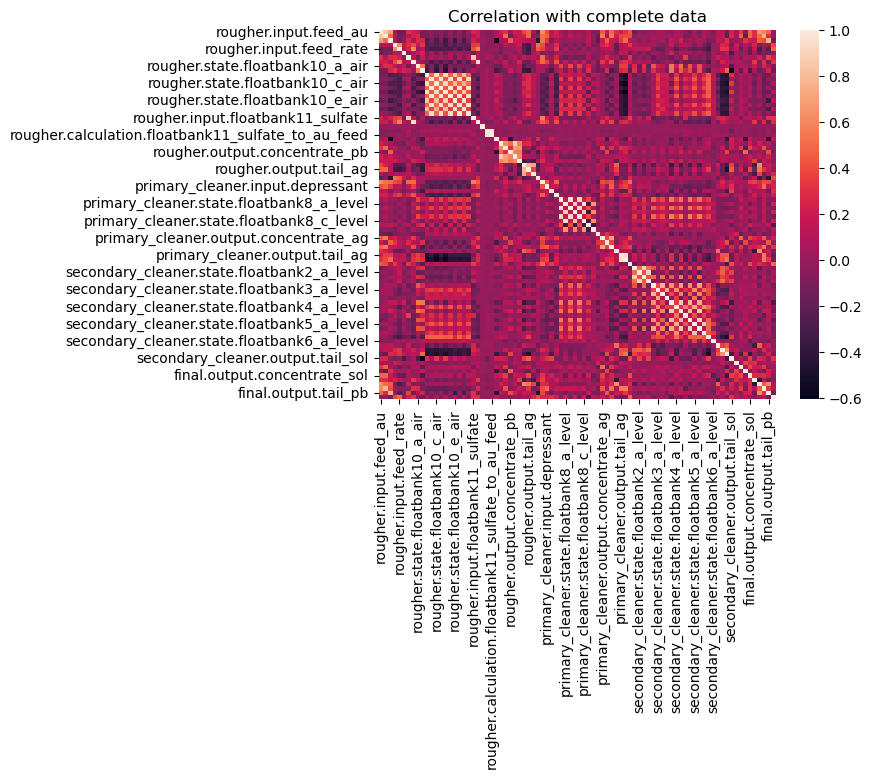

In [6]:
sns.heatmap(data_full.corr())
plt.title('Correlation with complete data')
plt.show()

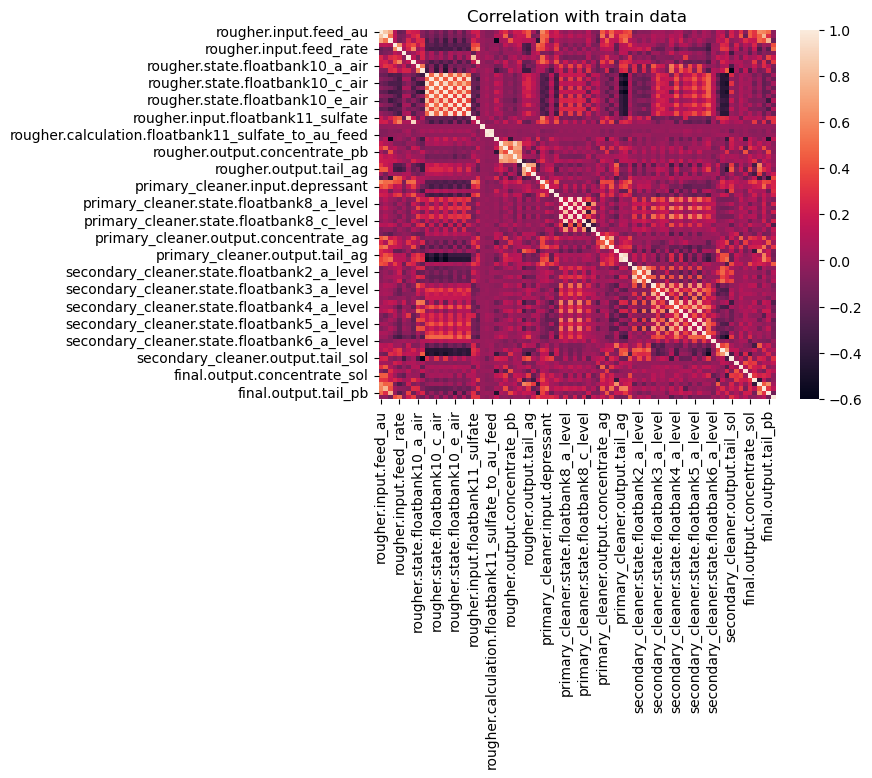

In [7]:
sns.heatmap(data_train.corr())
plt.title('Correlation with train data')
plt.show()

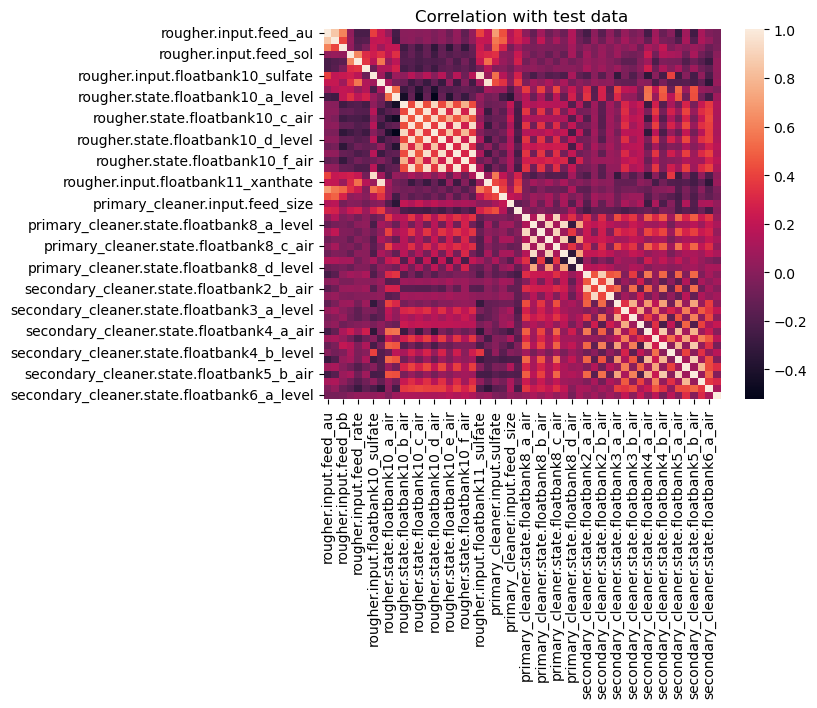

In [8]:
sns.heatmap(data_test.corr())
plt.title('Correlation with test data')
plt.show()

The variables are correlated.

In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5229 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5229 non-null   object 
 1   primary_cleaner.input.sulfate               5229 non-null   float64
 2   primary_cleaner.input.depressant            5229 non-null   float64
 3   primary_cleaner.input.feed_size             5229 non-null   float64
 4   primary_cleaner.input.xanthate              5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 10  primary_clea

Let's check that the recovery efficiency is calculated correctly.

In [11]:
recovery_efficiency = (data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])) / (
data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au'])) * 100
print(recovery_efficiency)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 11017, dtype: float64


In [12]:
print(data_train['rougher.output.recovery'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 11017, dtype: float64


As we can see, the data match.

Let's calculate it on the training sample for the attribute rougher.output.recovery and we find the average absolute error.

In [13]:
mean_absolute_error(recovery_efficiency, data_train['rougher.output.recovery'])

9.82970122149377e-15

The average absolute error is not very high, which indicates that there is no big difference, and therefore the indicators are correct.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Оценили `MAE` между исходным и расчётным значением эффективности обогащения и убедились, что эффективность обогащения рассчитана правильно - отлично!
</div>

In [14]:
print(data_train.shape)
print(data_test.shape)
print(data_full.shape)

(11017, 87)
(5229, 53)
(16094, 87)


In the tested data, we see that there are fewer columns than in the rest, because they are measured and calculated much later.

We check the list of variables that we have in datasets.

In [15]:
step = collections.Counter()
type_step = collections.Counter()
data = collections.Counter()
list_variables = [i for i in data_train.columns if i not in data_test.columns]
for i in list_variables:
    words = list(map(str,i.split(".")))
    step[words[0]] += 1
    type_step[words[1]] += 1
    data[words[2]] += 1
display(list_variables)   
display(type_step, step, data)          

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Counter({'output': 30, 'calculation': 4})

Counter({'final': 9,
         'primary_cleaner': 8,
         'rougher': 13,
         'secondary_cleaner': 4})

Counter({'concentrate_ag': 3,
         'concentrate_pb': 3,
         'concentrate_sol': 3,
         'concentrate_au': 3,
         'recovery': 2,
         'tail_ag': 4,
         'tail_pb': 4,
         'tail_sol': 4,
         'tail_au': 4,
         'sulfate_to_au_concentrate': 1,
         'floatbank10_sulfate_to_au_feed': 1,
         'floatbank11_sulfate_to_au_feed': 1,
         'au_pb_ratio': 1})

The following are not available in the target sample: rougher.calculation, final.output.recovery, final.output.concentrate_au, rougher.output.tail_sol, rougher.output.recovery and final.output.recovery.

# Conclusions

At this first stage of data manipulation, we found out what these types are, and also discovered that there are missing values that we had to deal with. We also checked with the help of correlations how some data correlate with others. Then we prepared the data for the training stage and discarded the column that is not suitable for analyzing and creating a machine learning model. The last step was one of the most important at this stage and consisted in verifying that the recovery efficiency was calculated correctly.

# Data Analysis

Let's see how the concentration of metals (Au, Ag, Pb) changes at various stages of purification.

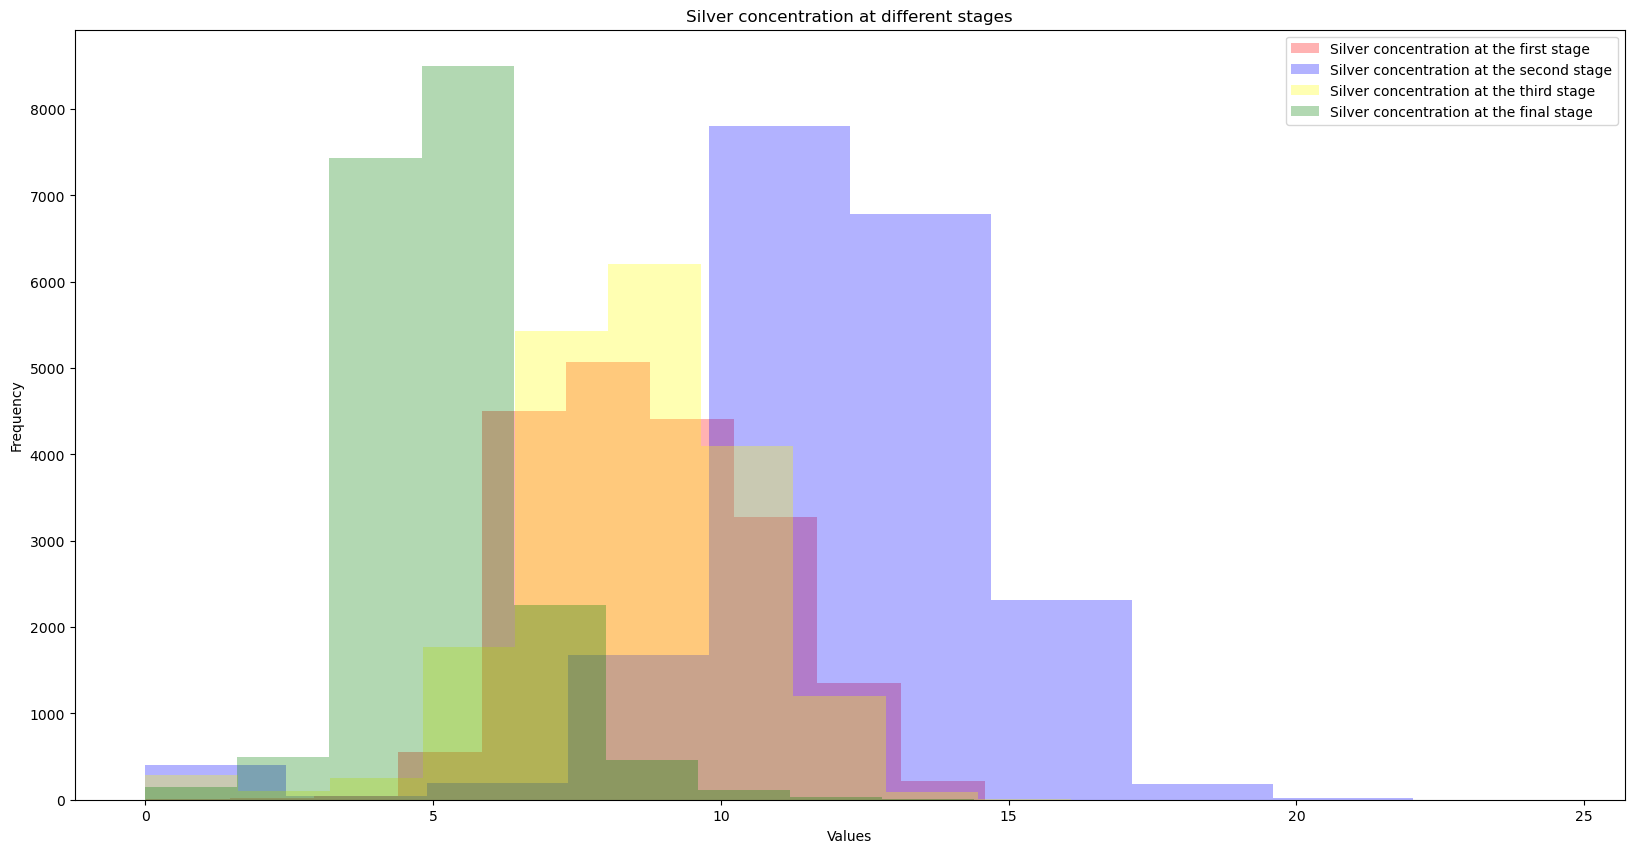

In [9]:
phase_one_ag = data_full['rougher.input.feed_ag']
phase_two_ag = data_full['rougher.output.concentrate_ag']
phase_three_ag = data_full['primary_cleaner.output.concentrate_ag']
final_phase_ag = data_full['final.output.concentrate_ag']
plt.figure(figsize=(20,10))
plt.hist(phase_one_ag, color='red', alpha=0.3, label='Silver concentration at the first stage')
plt.hist(phase_two_ag, color='blue', alpha=0.3, label='Silver concentration at the second stage')
plt.hist(phase_three_ag, color='yellow', alpha=0.3, label='Silver concentration at the third stage')
plt.hist(final_phase_ag, color='green', alpha=0.3, label='Silver concentration at the final stage')
plt.legend()
plt.xlabel('Values')                       
plt.ylabel('Frequency')
plt.title('Silver concentration at different stages')
plt.show()

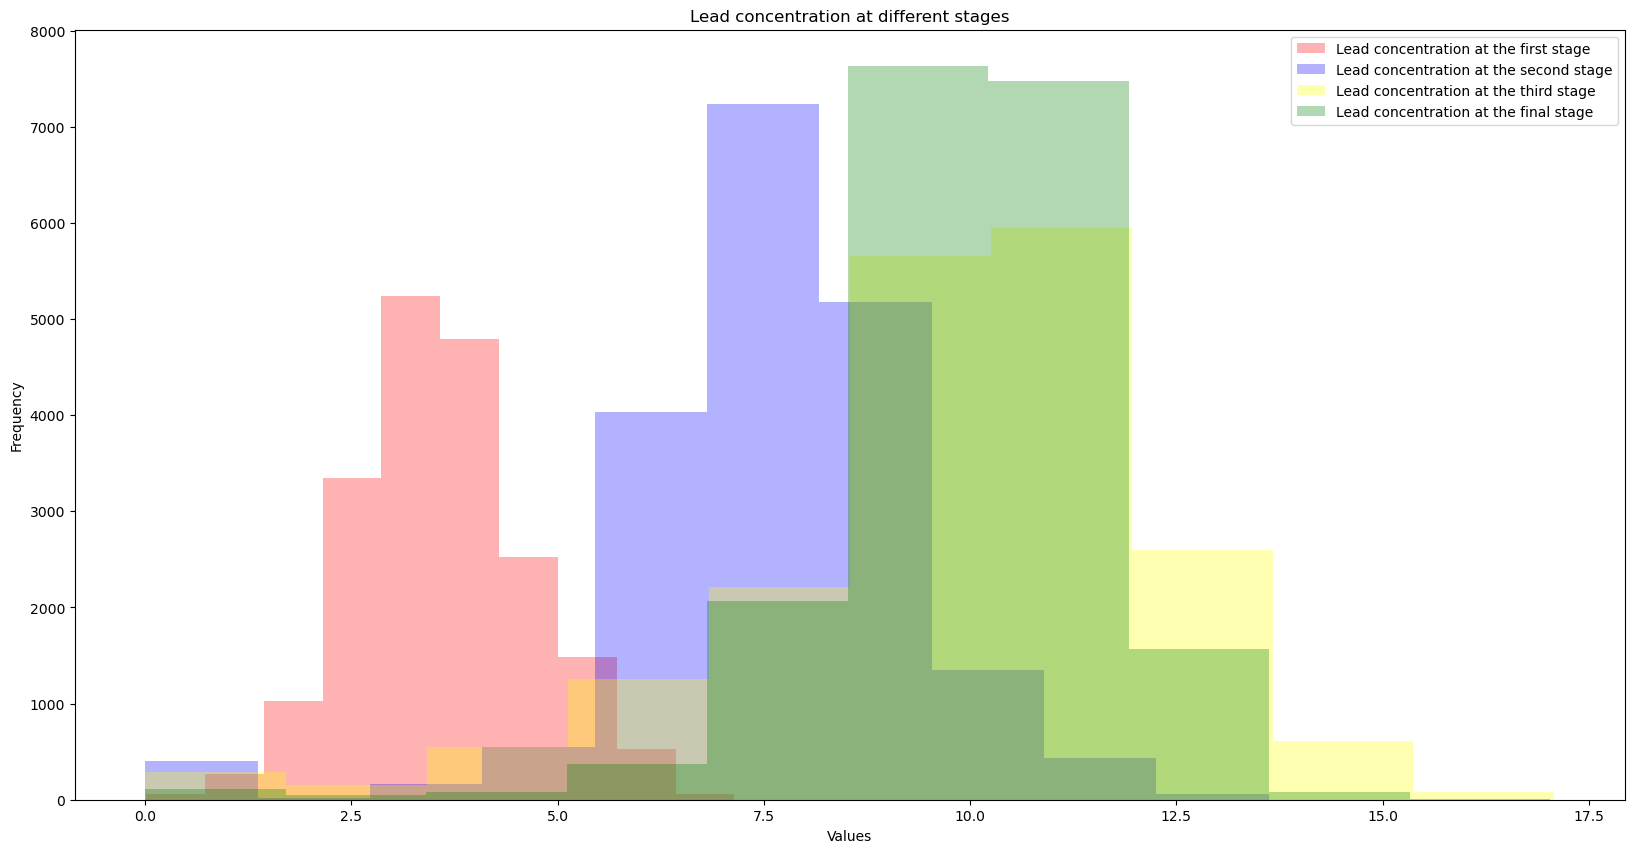

In [13]:
phase_one_pb = data_full['rougher.input.feed_pb']
phase_two_pb = data_full['rougher.output.concentrate_pb']
phase_three_pb = data_full['primary_cleaner.output.concentrate_pb']
final_phase_pb = data_full['final.output.concentrate_pb']
plt.figure(figsize=(20,10))
plt.hist(phase_one_pb, color='red', alpha=0.3, label='Lead concentration at the first stage')
plt.hist(phase_two_pb, color='blue', alpha=0.3, label='Lead concentration at the second stage')
plt.hist(phase_three_pb, color='yellow', alpha=0.3, label='Lead concentration at the third stage')
plt.hist(final_phase_pb, color='green', alpha=0.3, label='Lead concentration at the final stage')
plt.legend()
plt.xlabel('Values')                       
plt.ylabel('Frequency')
plt.title('Lead concentration at different stages')
plt.show()

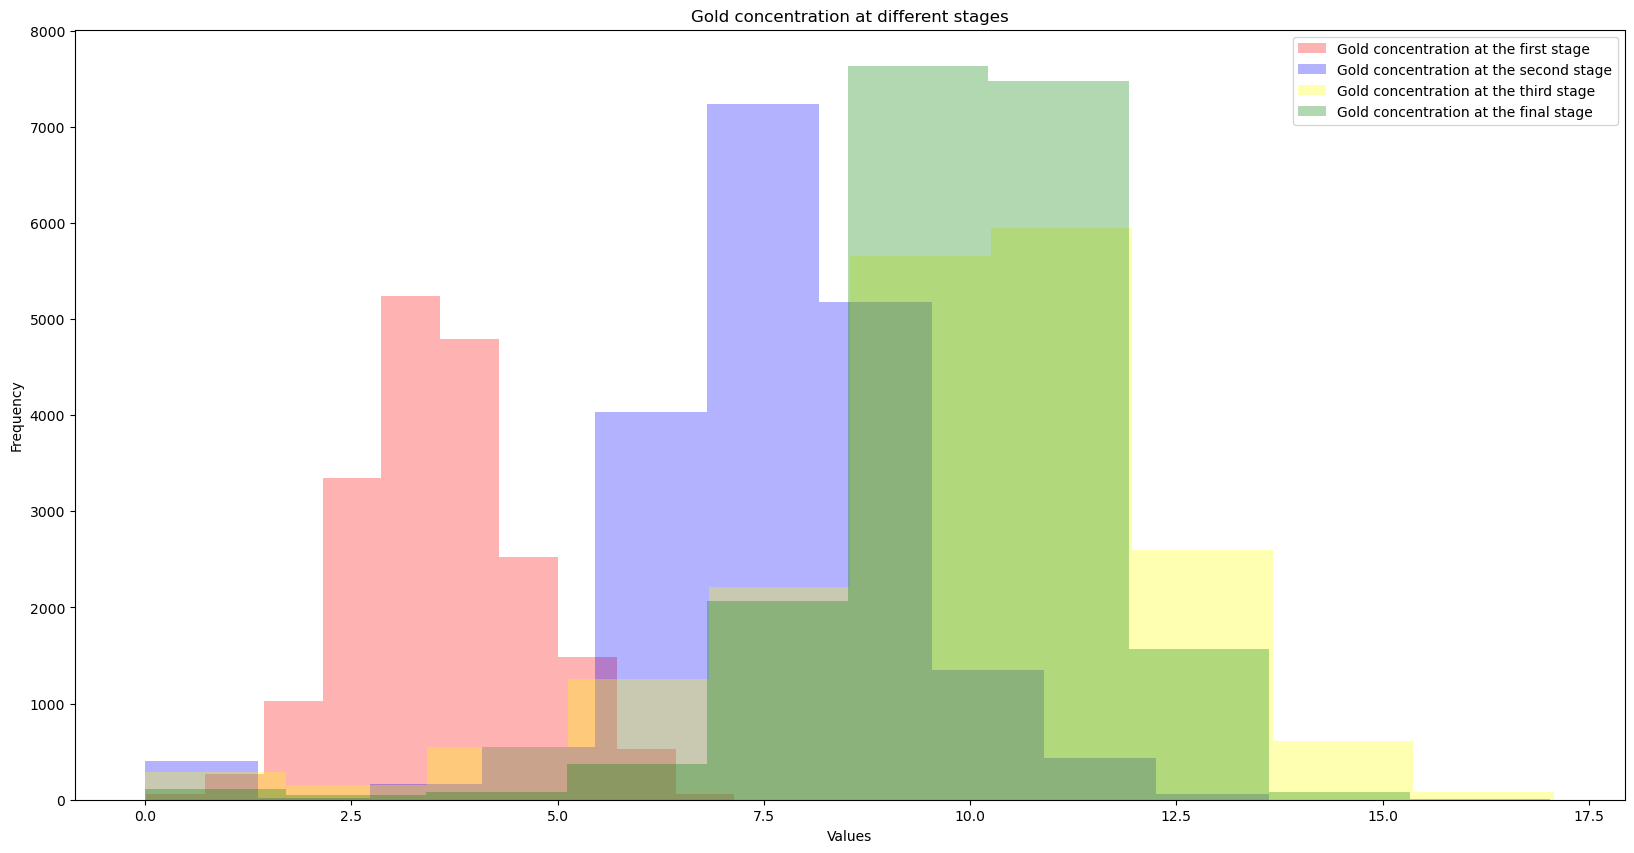

In [14]:
phase_one_au = data_full['rougher.input.feed_pb']
phase_two_au = data_full['rougher.output.concentrate_pb']
phase_three_au = data_full['primary_cleaner.output.concentrate_pb']
final_phase_au = data_full['final.output.concentrate_pb']
plt.figure(figsize=(20,10))
plt.hist(phase_one_au, color='red', alpha=0.3, label='Gold concentration at the first stage')
plt.hist(phase_two_au, color='blue', alpha=0.3, label='Gold concentration at the second stage')
plt.hist(phase_three_au, color='yellow', alpha=0.3, label='Gold concentration at the third stage')
plt.hist(final_phase_au, color='green', alpha=0.3, label='Gold concentration at the final stage')
plt.legend()
plt.xlabel('Values')                       
plt.ylabel('Frequency')
plt.title('Gold concentration at different stages')
plt.show()

In the first phase the silver concentration goes from less concentration to more concentration.

In the case of gold, the process is the other way around, the distribution is smaller in the first phase but becomes higher in the last phase.

Regarding lead, the concentrations increase in each of the phases, from less concentration to more concentration.

Gold at the final stage grew four times more than at the first stage, while silver fell and lead rose slightly.

The concentration of gold increased by 37 percent at the final stage, while the concentration of lead remained almost unchanged, and the concentration of silver decreased by 60 percent.

Let's now compare the size distributions of raw material in the training and test samples.

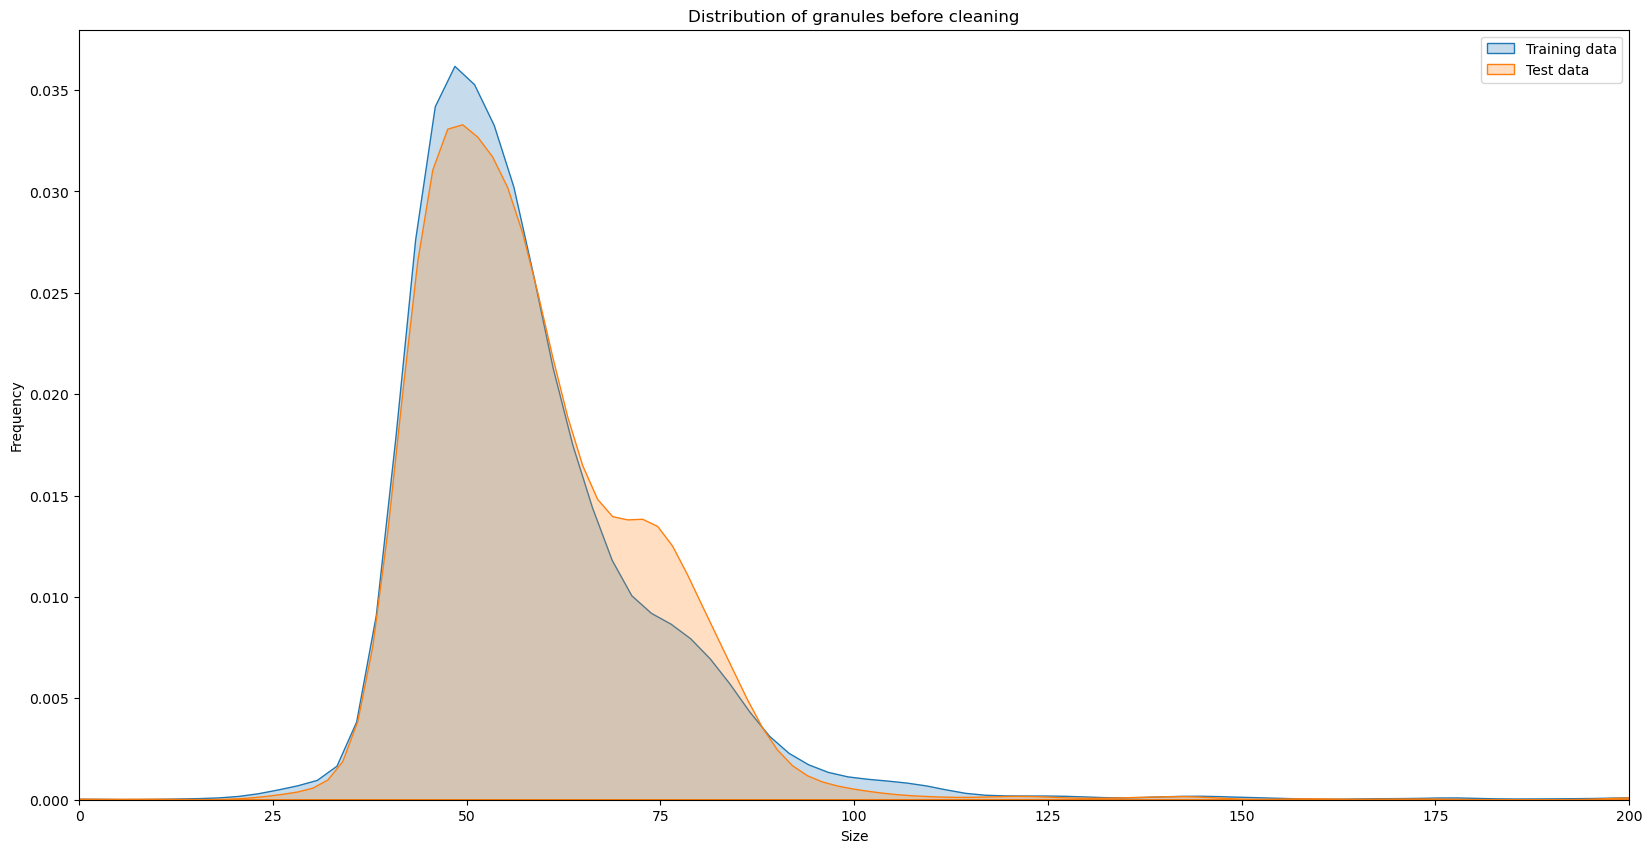

In [12]:
plt.figure(figsize=(20,10))
sns.kdeplot(data_train['rougher.input.feed_size'], shade=True, label='Training data')
sns.kdeplot(data_test['rougher.input.feed_size'], shade=True, label='Test data')
plt.legend()
plt.title('Distribution of granules before cleaning')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.show()

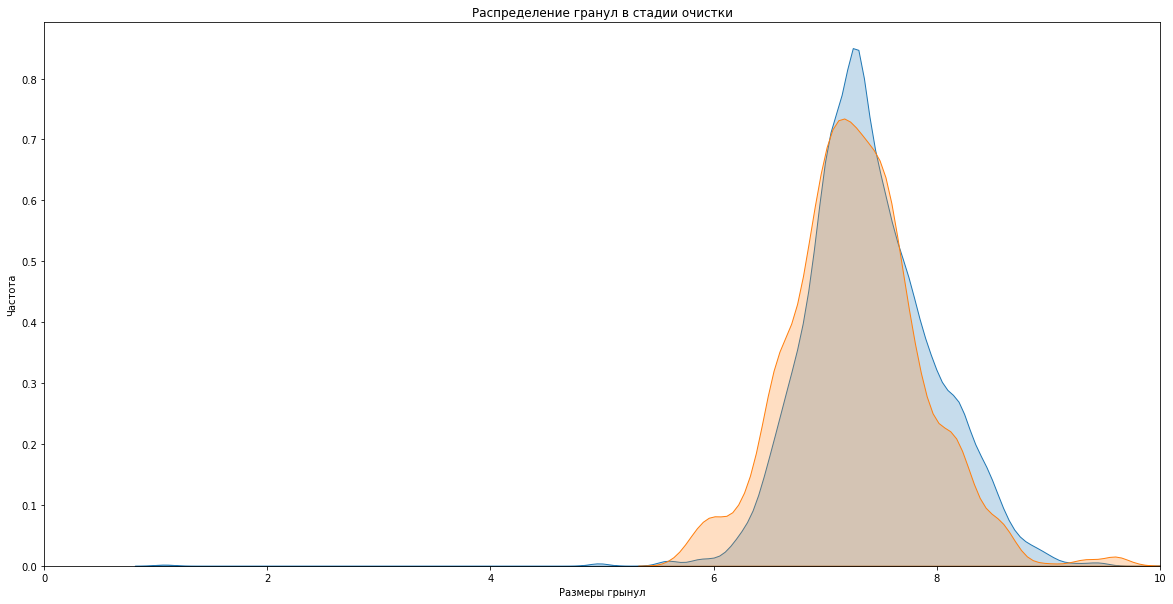

In [20]:
plt.figure(figsize=(20,10))
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], shade=True, label='Training data')
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], shade=True, label='Test data')
plt.title('Distribution of granules before cleaning')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.show()

As we can see, the distributions are very similar, so it won't cause us any problems in the future, the data is correct.

Now we are going to add the concentrations up at each of the stages.

In [19]:
data_full['sum_rough'] = data_full[['rougher.output.concentrate_ag', 
                           'rougher.output.concentrate_pb',
                          'rougher.output.concentrate_sol',
                          'rougher.output.concentrate_au']].sum(axis=1)
print(data_full.sum_rough)

0        66.424950
1        67.012710
2        66.103793
3        65.752751
4        65.908382
           ...    
19434    62.875473
19435    64.971535
19436    65.149381
19437    66.016067
19438    65.408849
Name: sum_rough, Length: 19439, dtype: float64


In [18]:
data_full['sum_raw'] = data_full[['rougher.input.feed_ag',
                                    'rougher.input.feed_pb',
                                    'rougher.input.feed_sol',
                                    'rougher.input.feed_au']].sum(axis=1)
display(data_full.sum_raw)

0        51.680034
1        50.659114
2        50.609929
3        51.061546
4        47.859163
           ...    
19434    55.136720
19435    55.723433
19436    54.950157
19437    52.807165
19438    51.941235
Name: sum_raw, Length: 19439, dtype: float64

In [17]:
data_full['sum_clean'] = data_full[['primary_cleaner.output.concentrate_ag', 
                                    'primary_cleaner.output.concentrate_pb',
                                   'primary_cleaner.output.concentrate_sol',
                                   'primary_cleaner.output.concentrate_au']].sum(axis=1)
display(data_full.sum_clean)

0        72.640924
1        72.543485
2        72.095042
3        59.957723
4        71.321010
           ...    
19434    47.398055
19435    71.707167
19436    72.833250
19437    56.436665
19438    71.887397
Name: sum_clean, Length: 19439, dtype: float64

In [16]:
data_full['sum_final'] = data_full[['final.output.concentrate_ag',
                                   'final.output.concentrate_pb',
                                   'final.output.concentrate_sol',
                                   'final.output.concentrate_au']].sum(axis=1)
display(data_full.sum_final)

0        63.644396
1        63.957723
2        64.311180
3        63.573449
4        64.004667
           ...    
19434    65.234882
19435    65.978097
19436    65.560640
19437    64.657968
19438    64.185200
Name: sum_final, Length: 19439, dtype: float64

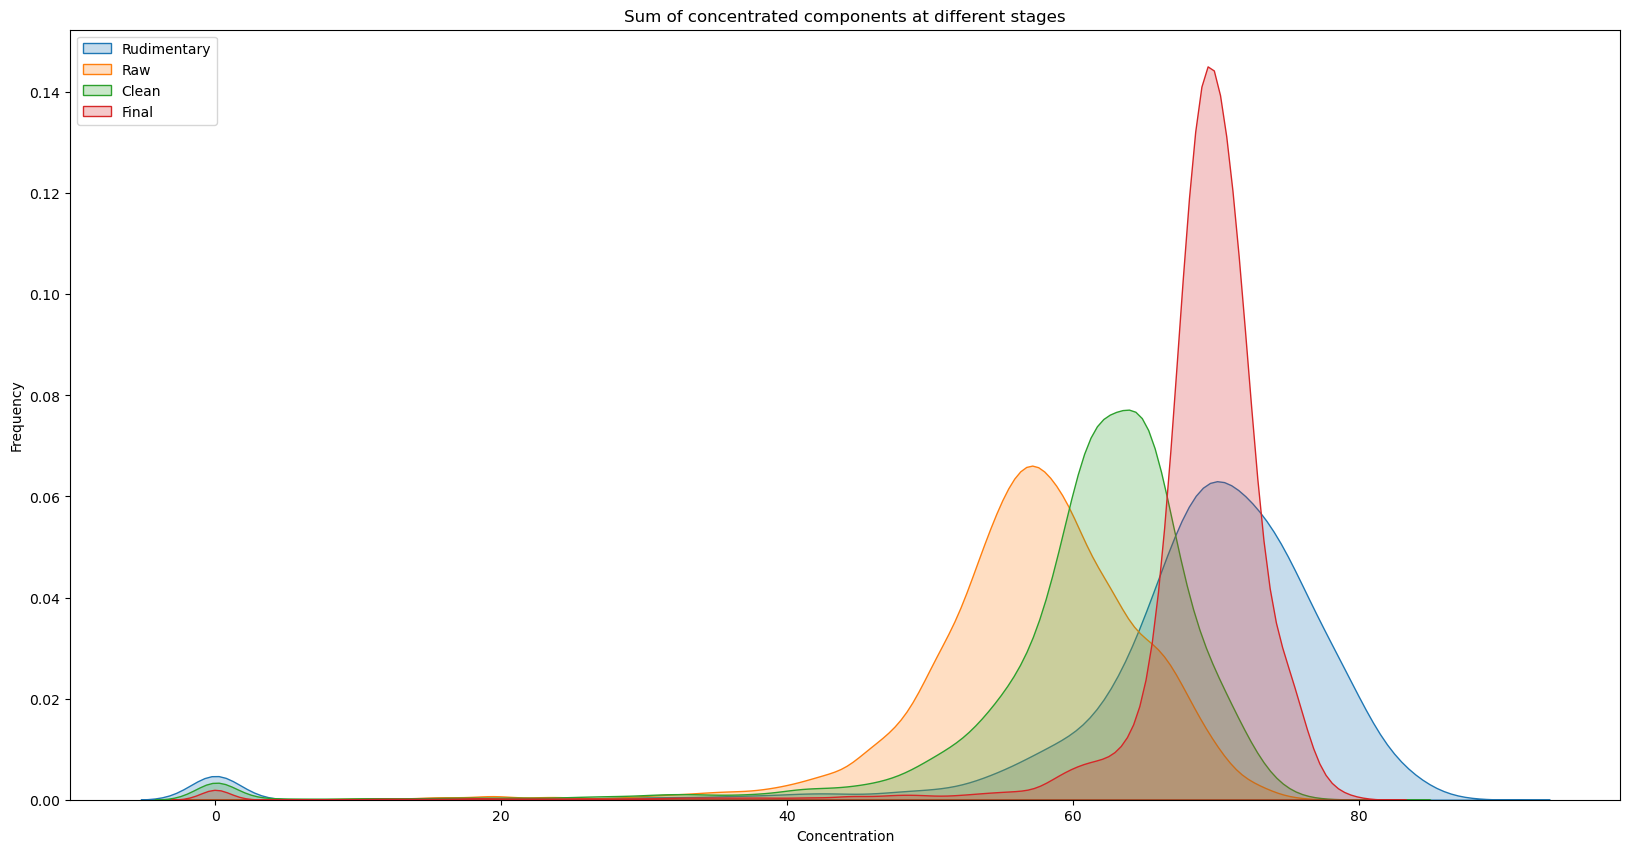

In [20]:
ax1=data_full['sum_rough']
ax2=data_full['sum_raw']
ax3=data_full['sum_clean']
ax4=data_full['sum_final']
plt.figure(figsize=(20, 10))
sns.kdeplot(data=ax1, shade=True, label='Rudimentary')
sns.kdeplot(data=ax2, shade=True, label='Raw')
sns.kdeplot(data=ax3, shade=True, label='Clean')
sns.kdeplot(data=ax4, shade=True, label='Final')
plt.legend(loc='upper left')
plt.title('Sum of concentrated components at different stages')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.show()

A higher concentration of components is detected both at the purification stage and at the final stage.

There are few elements in the range from zero to 40, the best thing we could do in this case is to remove them so that they do not affect the analysis.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Исследована суммарная концентрация металлов на разных стадиях техпроцесса - отлично! Также отмечено наличие нулевых значений и необходимость их удаления - тут всё круто!
</div>

In [21]:
data_full = data_full[data_full.sum_rough >= 40]
data_full = data_full[data_full.sum_clean >= 40]
data_full = data_full[data_full.sum_raw >= 40]
data_full = data_full[data_full.sum_final >= 40]

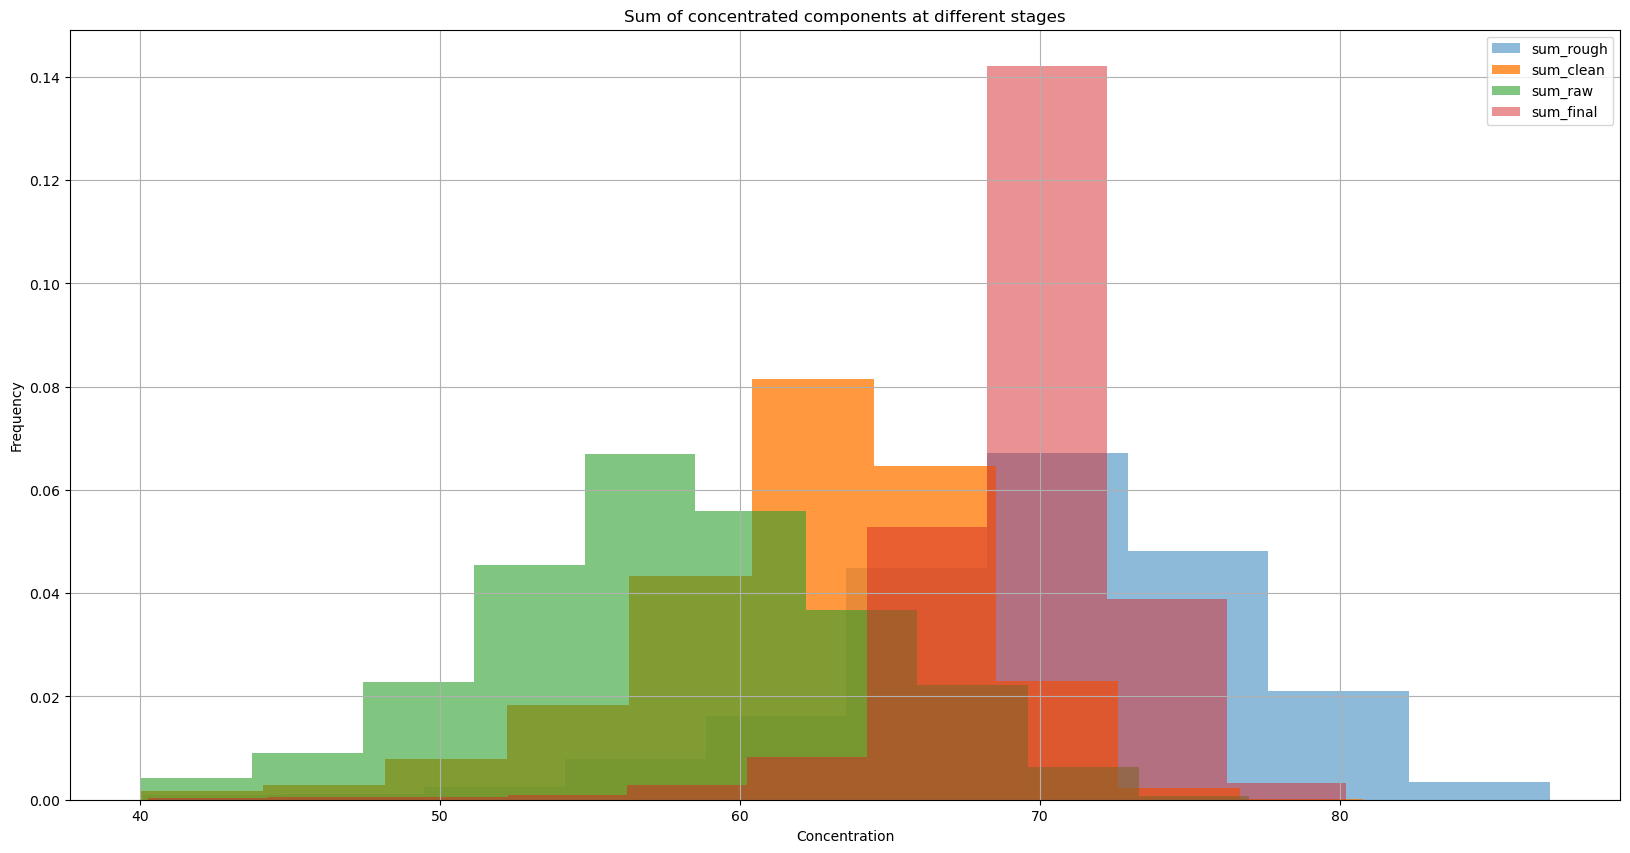

In [22]:
plt.figure(figsize=(20, 10))
ax = data_full.sum_rough.hist(alpha=0.5, legend=True, density=True)
data_full.sum_clean.hist(ax=ax, alpha = 0.8, legend=True, density=True)
data_full.sum_raw.hist(ax=ax, legend=True, alpha=0.6, density=True)
data_full.sum_final.hist(ax=ax, legend=True, alpha=0.5, density=True)
plt.title('Sum of concentrated components at different stages')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.show()

Now we see much more clearly how data is normally distributed.

At the cleaning stage, we see how the sum of the components decreases after deleting atypical values.

## Conclusions
In this analytical part, we studied how the components change during extaction gold proccesing at various stages, and saw how lead and silver reduce their presence in each of them until the final phase, when the concentration of gold exceeds all the others, as expected. At the first stage, gold makes up 50% of the total number of components, silver-30% and lead-20%. At the second stage, the share of gold exceeds 60%, while the share of silver and lead is almost the same-about 20%. At the last stage, most of the silver turns into gold, which grows by 37%, while lead remains at a level similar to the previous one.
We also studied the distribution of the components and found that the data surrounding it is distributed normally, which guarantees us the correctness of the data we are dealing with. In the part where we sum all the components, we remove the extreme values and decide to remove them so that they do not have a harmful effect on the analysis and subsequent construction of the model.

# Model

Let's write a function to calculate the final sMAPE.

In [28]:
def smape(target, predicted):
    error = np.abs(target - predicted)
    scale = (np.abs(target) + np.abs(predicted)) / 2
    return np.mean(error / scale) * 100
def final_smape(smape_rougher, smape_final):
    return (0.25*smape_rougher + 0.75*smape_final)

We prepare training data before training.

In [29]:
data_train = data_train.drop([
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au'], axis=1)

In [44]:
target_train_rougher = data_train['rougher.output.recovery'].reset_index(drop=True) 

In [45]:
target_train_final = data_train['final.output.recovery'].reset_index(drop=True) 

In [46]:
data_features_train = data_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1) 

In [47]:
features_train_rougher = data_train.loc[:,data_features_train.columns] 

In [48]:
features_train_final = features_train_rougher

In [38]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on=('date'))
target_test_rougher = data_test['rougher.output.recovery'].reset_index(drop=True) 
target_test_final = data_test['final.output.recovery'].reset_index(drop=True) 
data_features = data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1) 
features_test_rougher = data_test.loc[:,data_features.columns] 
features_test_final = features_test_rougher

Now we are doing the same thing, at least to create a goal in two steps.

In [39]:
model_forest = RandomForestRegressor(random_state=1234, max_depth=10, n_estimators=50)
model_tree = DecisionTreeRegressor(random_state=1234)

Using the GridSearchCV method, we will search for the best parameters for our models.

In [40]:
params_random = {'n_estimators':range(10, 60, 10), 'max_depth':[None] + [i for i in range(2, 11)]} 
params_tree = {'max_depth': [None] + [i for i in range(2, 11)]}

In [41]:
scorer = make_scorer(smape, greater_is_better=False) 

In [42]:
grid_rougher_forest = GridSearchCV(model_forest,
                                   param_grid = params_random,
                                   scoring=scorer, n_jobs=-1, verbose=10, cv=3)
grid_final_forest = GridSearchCV(model_forest,
                                 param_grid = params_random,
                                 scoring=scorer, n_jobs=-1, verbose=10, cv=3)
grid_rougher_tree = GridSearchCV(model_tree,
                                 param_grid = params_tree,
                                 scoring=scorer, n_jobs=-1, verbose=10, cv=3)
grid_final_tree = GridSearchCV(model_tree,
                               param_grid = params_tree,
                               scoring=scorer, n_jobs=-1, verbose=10, cv=3) 

In [43]:
grid_rougher_forest.fit(features_train_rougher,target_train_rougher)
grid_final_forest.fit(features_train_final,target_train_final)
grid_rougher_tree.fit(features_train_rougher,target_train_rougher)
grid_final_tree.fit(features_train_final, target_train_final)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START max_depth=None, n_estimators=10............................
[CV 1/3; 1/50] END ..........max_depth=None, n_estimators=10; total time=   1.1s
[CV 2/3; 1/50] START max_depth=None, n_estimators=10............................
[CV 2/3; 1/50] END ..........max_depth=None, n_estimators=10; total time=   1.0s
[CV 3/3; 1/50] START max_depth=None, n_estimators=10............................
[CV 3/3; 1/50] END ..........max_depth=None, n_estimators=10; total time=   1.0s
[CV 1/3; 2/50] START max_depth=None, n_estimators=20............................
[CV 1/3; 2/50] END ..........max_depth=None, n_estimators=20; total time=   2.0s
[CV 2/3; 2/50] START max_depth=None, n_estimators=20............................
[CV 2/3; 2/50] END ..........max_depth=None, n_estimators=20; total time=   1.9s
[CV 3/3; 2/50] START max_depth=None, n_estimators=20............................
[CV 3/3; 2/50] END ..........max_depth=None, n_

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

In [49]:
print("Лучшие параметры для моделей")
print(grid_rougher_forest.best_estimator_)
print(grid_final_forest.best_estimator_)
print(grid_rougher_tree.best_estimator_)
print(grid_final_tree.best_estimator_)

Лучшие параметры для моделей
RandomForestRegressor(max_depth=2, n_estimators=10, random_state=1234)
RandomForestRegressor(max_depth=2, n_estimators=40, random_state=1234)
DecisionTreeRegressor(max_depth=2, random_state=1234)
DecisionTreeRegressor(max_depth=2, random_state=1234)


In [50]:
print('Фаза более грубая')
print('Forest: ', -grid_rougher_forest.best_score_)
print('Tree: ', -grid_rougher_tree.best_score_)
print('Заключительный этап')
print('Forest: ', -grid_final_forest.best_score_)
print('Tree: ', -grid_final_tree.best_score_)

Фаза более грубая
Forest:  4.520253889309764
Tree:  4.702705760942377
Заключительный этап
Forest:  7.674627119774335
Tree:  7.7307513570056114


In [51]:
print('Средневзвешенный лес: ', -final_smape(grid_rougher_forest.best_score_, grid_final_forest.best_score_))
print('Средневзвешенное дерево: ', -final_smape(grid_rougher_tree.best_score_, grid_final_tree.best_score_))

Средневзвешенный лес:  6.8860338121581925
Средневзвешенное дерево:  6.973739957989802


We see that the random forest tree model gives us slightly fewer errors than the tree model, so we are going to test the forest model at the testing stage.

Both at one stage and at another, the best video model is the random forest model, at the first stage with a big difference, and at the second stage with a much smaller difference.
Now we are going to move on to testing a model with a random forest with the most appropriate parameters.

In [52]:
model_forest_predict_rough = grid_rougher_forest.best_estimator_.predict(features_test_rougher)
model_forest_predict_final = grid_final_forest.best_estimator_.predict(features_test_final)

In [53]:
smape_rougher_forest = smape(target_test_rougher, model_forest_predict_rough)
smape_final_forest = smape(target_test_final, model_forest_predict_final)

In [54]:
print('final_smape на тестовой выборке: ', final_smape(smape_rougher_forest, smape_final_forest))

final_smape на тестовой выборке:  5.201185477217588


In [55]:
dummy_rough = DummyRegressor(strategy='mean')
dummy_final = DummyRegressor(strategy='mean')
dummy_rough.fit(features_train_rougher,target_train_rougher)
dummy_final.fit(features_train_final,target_train_final)
dummy_rough_predict = dummy_rough.predict(features_test_rougher)
dummy_final_predict = dummy_final.predict(features_test_final)
smape_rougher_dummy = smape(target_test_rougher, dummy_rough_predict)
smape_final_dummy = smape(target_test_final, dummy_final_predict)
print('final_smape dummy: ', final_smape(smape_rougher_dummy, smape_final_dummy))

final_smape dummy:  6.074218275043988


Smaper for a constant model is less convenient than the random forest model, because its value is too large.

### Conclusions
At the last stage, we created several instances of a decision tree regressor and a random forest regressor. We selected the best parameters for each of them and tested them, after which we found that the random forest model is better than the tree model. During testing, we got a rather low final result, so we can be sure that our model is suitable for predicting gold production and, thus, will save the company money on future production.